In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

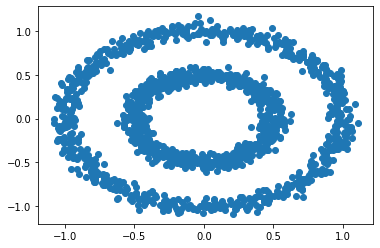

In [2]:
data = pd.read_csv("circles.csv")
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.show()

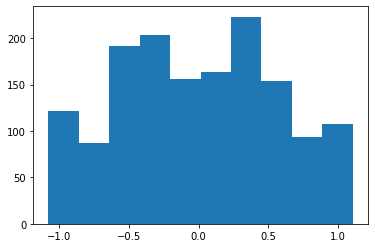

In [3]:
plt.hist(data.iloc[:,0])
plt.show()

In [4]:
data

,0,1
0,0.393992,-0.416376
1,0.528243,-0.828242
2,-0.740158,0.607730
3,-0.971016,0.316821
4,0.018693,-0.605288
...,...,...
1495,0.085197,-0.463028
1496,0.890820,0.003483
1497,0.223768,-0.419122
1498,0.221189,-0.510314


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1500 non-null   float64
 1   1       1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


In [6]:
data = pd.read_csv("wholesale_customers_data.csv")


In [7]:
data.isnull().sum()


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [9]:
# Display all columns with thier no of outliers

outliers = {}
for i in range(data.shape[1]):
    min_t = data[data.columns[i]].mean() - (3 * data[data.columns[i]].std())
    max_t = data[data.columns[i]].mean() + (3 * data[data.columns[i]].std())
    count = 0
    for j in data[data.columns[i]]:
        if j < min_t or j > max_t:
            count += 1
    outliers[data.columns[i]] = [count,data.shape[0]-count]
print(outliers)

{'Channel': [0, 440], 'Region': [0, 440], 'Fresh': [7, 433], 'Milk': [9, 431], 'Grocery': [7, 433], 'Frozen': [6, 434], 'Detergents_Paper': [10, 430], 'Delicassen': [4, 436]}


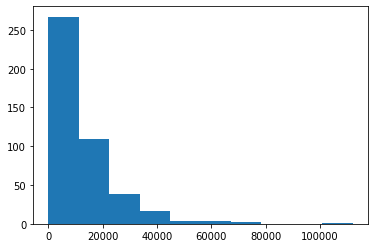

In [10]:
# Fresh has 7 outliers , check it with histogram
plt.hist(data["Fresh"])
plt.show()

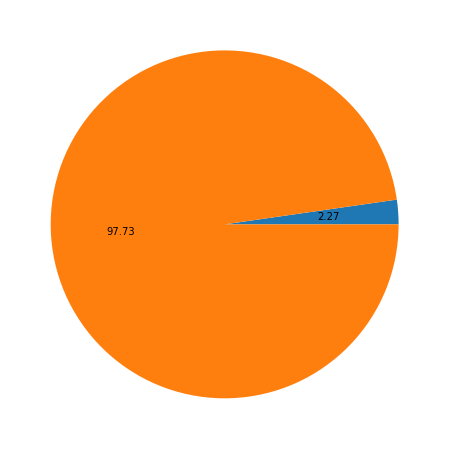

In [11]:
# To check perctage of outlier in Detergents_Paper using pie chart
plt.figure(figsize=(8,8))
plt.pie(outliers["Detergents_Paper"],autopct="%.2f")
plt.show()

Since no of outliers are very less compared to data, so we can ignore it

In [12]:
# Rescale data
data_standardized = (data - data.mean())/data.std()
data_standardized.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.447005,0.589997,0.052873,0.522972,-0.041068,-0.588697,-0.043519,-0.066264
1,1.447005,0.589997,-0.390857,0.543839,0.170125,-0.269829,0.086309,0.089050
2,1.447005,0.589997,-0.446521,0.408073,-0.028125,-0.137379,0.133080,2.240742
3,-0.689512,0.589997,0.099998,-0.623310,-0.392530,0.686363,-0.498021,0.093305
4,1.447005,0.589997,0.839284,-0.052337,-0.079266,0.173661,-0.231654,1.297870
